#Cars Price Prediction Regression Model

#Importing Libraries

In [611]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


In [612]:
data = pd.read_csv('cars_price.csv')

In [613]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [614]:
data.shape

(205, 26)

In [615]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [616]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#Cleaning Data

In [617]:
data['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [618]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [619]:
data.notnull().sum()

symboling            205
normalized-losses    205
make                 205
fuel-type            205
aspiration           205
num-of-doors         205
body-style           205
drive-wheels         205
engine-location      205
wheel-base           205
length               205
width                205
height               205
curb-weight          205
engine-type          205
num-of-cylinders     205
engine-size          205
fuel-system          205
bore                 205
stroke               205
compression-ratio    205
horsepower           205
peak-rpm             205
city-mpg             205
highway-mpg          205
price                205
dtype: int64

In [620]:
data.duplicated().sum()

0

In [621]:
cols = data.columns
cols

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [622]:
for col in cols:
    
    print(col,data[col].nunique())  

symboling 6
normalized-losses 52
make 22
fuel-type 2
aspiration 2
num-of-doors 3
body-style 5
drive-wheels 3
engine-location 2
wheel-base 53
length 75
width 44
height 49
curb-weight 171
engine-type 7
num-of-cylinders 7
engine-size 44
fuel-system 8
bore 39
stroke 37
compression-ratio 32
horsepower 60
peak-rpm 24
city-mpg 29
highway-mpg 30
price 187


In [623]:
for col in cols:
    
    print(col,data[col].unique())  

symboling [ 3  1  2  0 -1 -2]
normalized-losses ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four' '?']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.

In [624]:
cl = ['normalized-losses','num-of-doors','bore', 'stroke','horsepower', 'peak-rpm', 'price']

for col in cl:
  print(data[col].value_counts())

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64
four    114
two      89
?         2
Name: num-of-doors, dtype: int64
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1

In [625]:
for col in cl :
  data[col].replace({'?': np.nan},inplace = True)

In [626]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [627]:
cl = ['normalized-losses','num-of-doors','bore', 'stroke','horsepower', 'peak-rpm', 'price']

for col in cl:
  print(data[col].unique())

[nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
['two' 'four' nan]
['3.47' '2.68' '3.19' '3.13' '3.5' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.6' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' nan '3.39' '3.76'
 '3.58' '3.46' '3.8' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.7'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']
['2.68' '3.47' '3.4' '2.8' '3.19' '3.39' '3.03' '3.11' '3.23' '3.46' '3.9'
 '3.41' '3.07' '3.58' '4.17' '2.76' '3.15' nan '3.16' '3.64' '3.1' '3.35'
 '3.12' '3.86' '3.29' '3.27' '3.52' '2.19' '3.21' '2.9' '2.07' '2.36'
 '2.64' '3.08' '3.5' '3.54' '2.87']
['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '

In [628]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [629]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [630]:
string = ['normalized-losses','horsepower','peak-rpm', 'price','bore', 'stroke']
#data['normalized-losses'] = data['normalized-losses'].astype(float)
# data['horsepower'] = data['horsepower'].astype(float)
# data['peak-rpm'] = data['peak-rpm'].astype(float)
# data['price'] = data['price'].astype(float)
# data['bore'] = data['bore'].astype(float)
# data['stroke'] = data['stroke'].astype(float)

for s in string:
  data[s] = data[s].astype(float)

In [631]:
for col in cols:
  print(col,data[col].unique())

symboling [ 3  1  2  0 -1 -2]
normalized-losses [ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]
make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four' nan]
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
wheel-base [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108

In [632]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [633]:
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].mean())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].mean())
data['price'] = data['price'].fillna(data['price'].mean())
data['bore'] = data['bore'].fillna(data['bore'].mean())
data['stroke'] = data['stroke'].fillna(data['stroke'].mean())
#Replacing '4wd' with 'fwd' in 'drivewheel' column
data['drive-wheels'] = data['drive-wheels'].replace('4wd','fwd')

In [634]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [635]:
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [636]:
data['num-of-doors'].replace({np.nan : 'two'},inplace = True)

In [637]:
data['drive-wheels'].unique()

array(['rwd', 'fwd'], dtype=object)

In [638]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [639]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [640]:
data.describe().style.background_gradient()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [641]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#Handelling Outliers
- We can see that there are (205-88)= 117 records, which are outliers in the dataset.

In [642]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
# #cul = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
#        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
#        'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
#        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
#        'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
#        'highway-mpg', 'price']

col_numeric = ['wheel-base','normalized-losses', 'length', 'width', 'height', 'curb-weight','engine-size','bore', 'stroke',
               'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg', 'price']

for col in col_numeric: 
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    data = data.loc[(data[col] > range_low) & (data[col] < range_high)]

data.shape

(121, 26)

#Checking Data Imbalance

- We can see that there is data imbalance in below columns:-

  - symboling - There are very few with rating -2.
  - fuletype - All the cars fule type is Gas, as Diesel cars were removed while removing outliers..
  - aspiration - Lesser number of turbo than std.
  - engineloaction - All the engine location is in front, as all the rear      engine cars were removed while removing outliers.
  - enginetype - Considerably more number of ohc than others.
  - cylindernumber - Large number of four cyliners than others.
  - fulesystem - mpfi and 2bbl fulesystem cars are more comparitavely others.
  - CarCompany - Most of the Toyata company cars were surveyed.

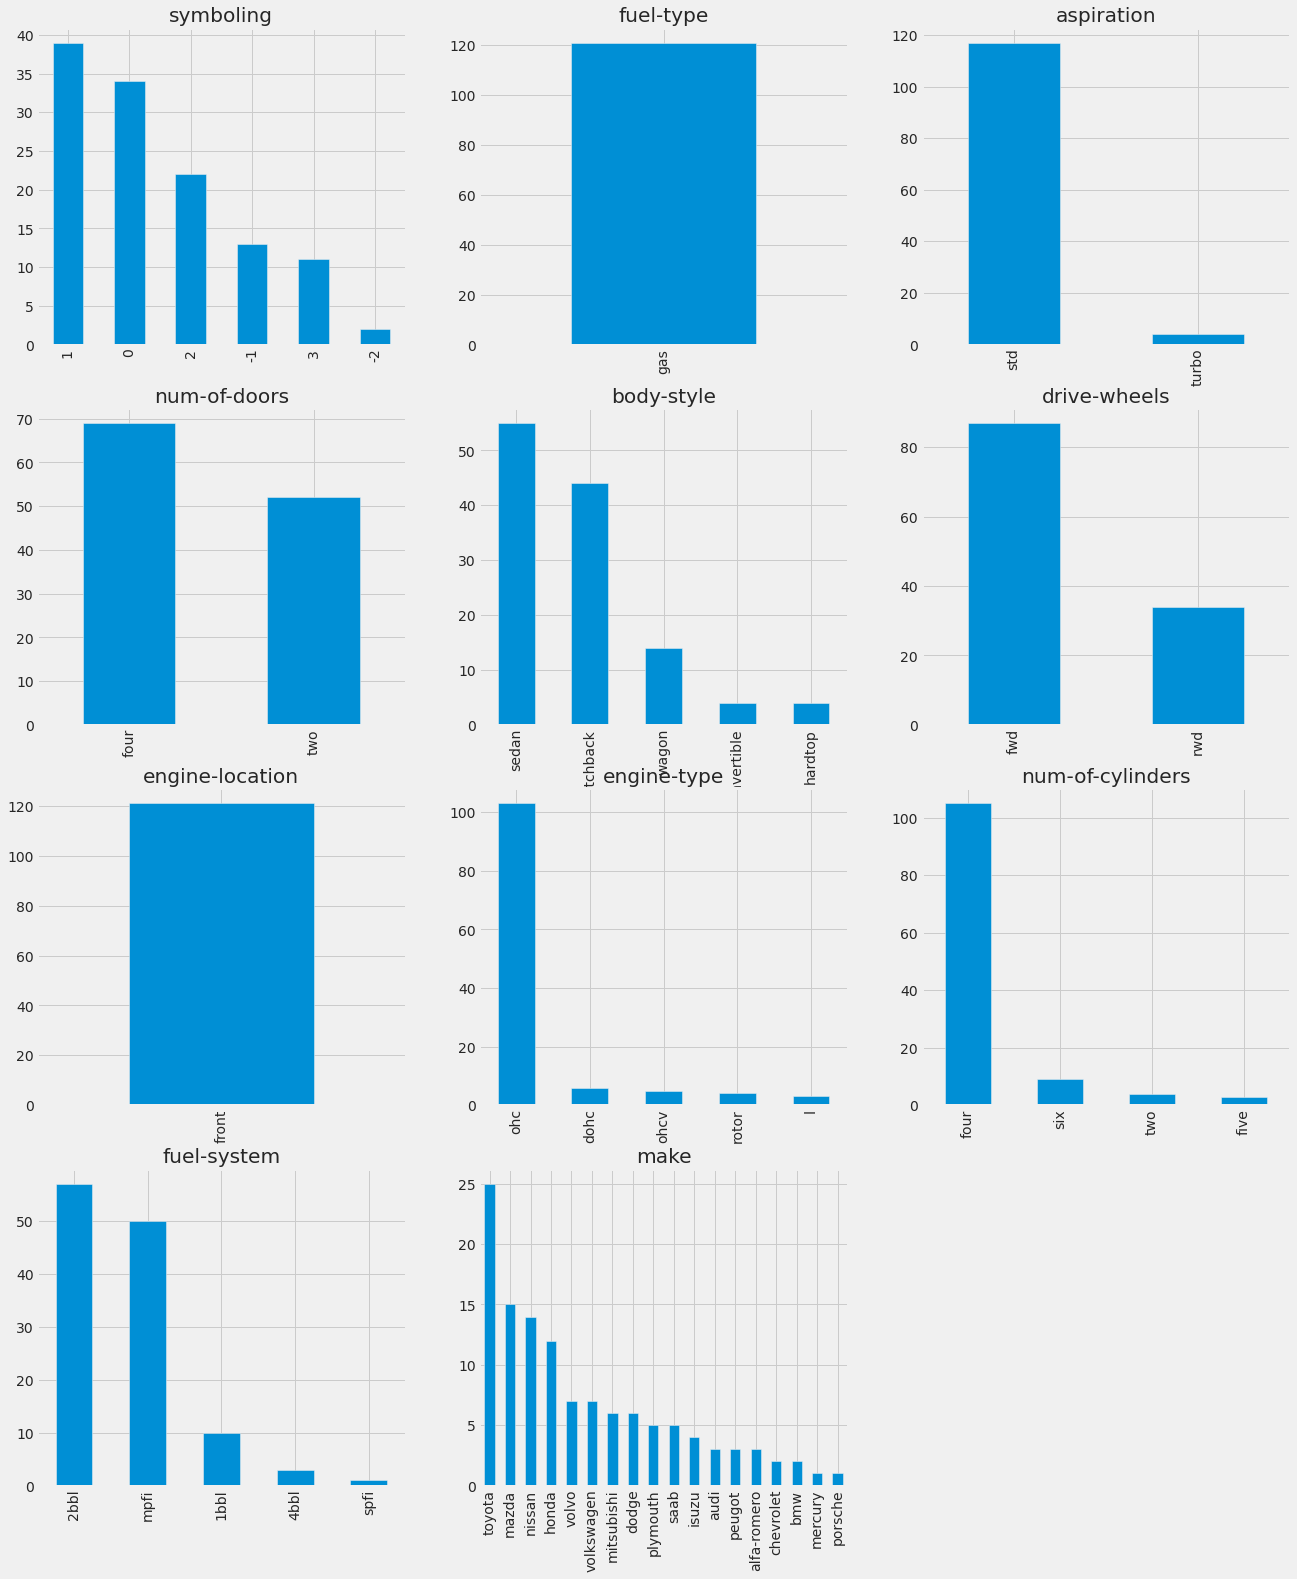

In [643]:
# Listing categorical columns for checking data imbalance and plotting them

# #cul = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
#        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
#        'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
#        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
#        'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
#        'highway-mpg', 'price']

col_category = ['symboling','fuel-type', 'aspiration','num-of-doors', 'body-style', 'drive-wheels', 'engine-location','engine-type',
           'num-of-cylinders','fuel-system','make']

k=0
plt.figure(figsize=(20,25))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3,k)    
    data[col].value_counts().plot(kind='bar');
    plt.title(col)

#Visualising the data to check the possiblity of linear regression model
- We can see that there are few columns that have linear relationship with the target variable "price". So, we can build a linear regression model here.

<Figure size 864x864 with 0 Axes>

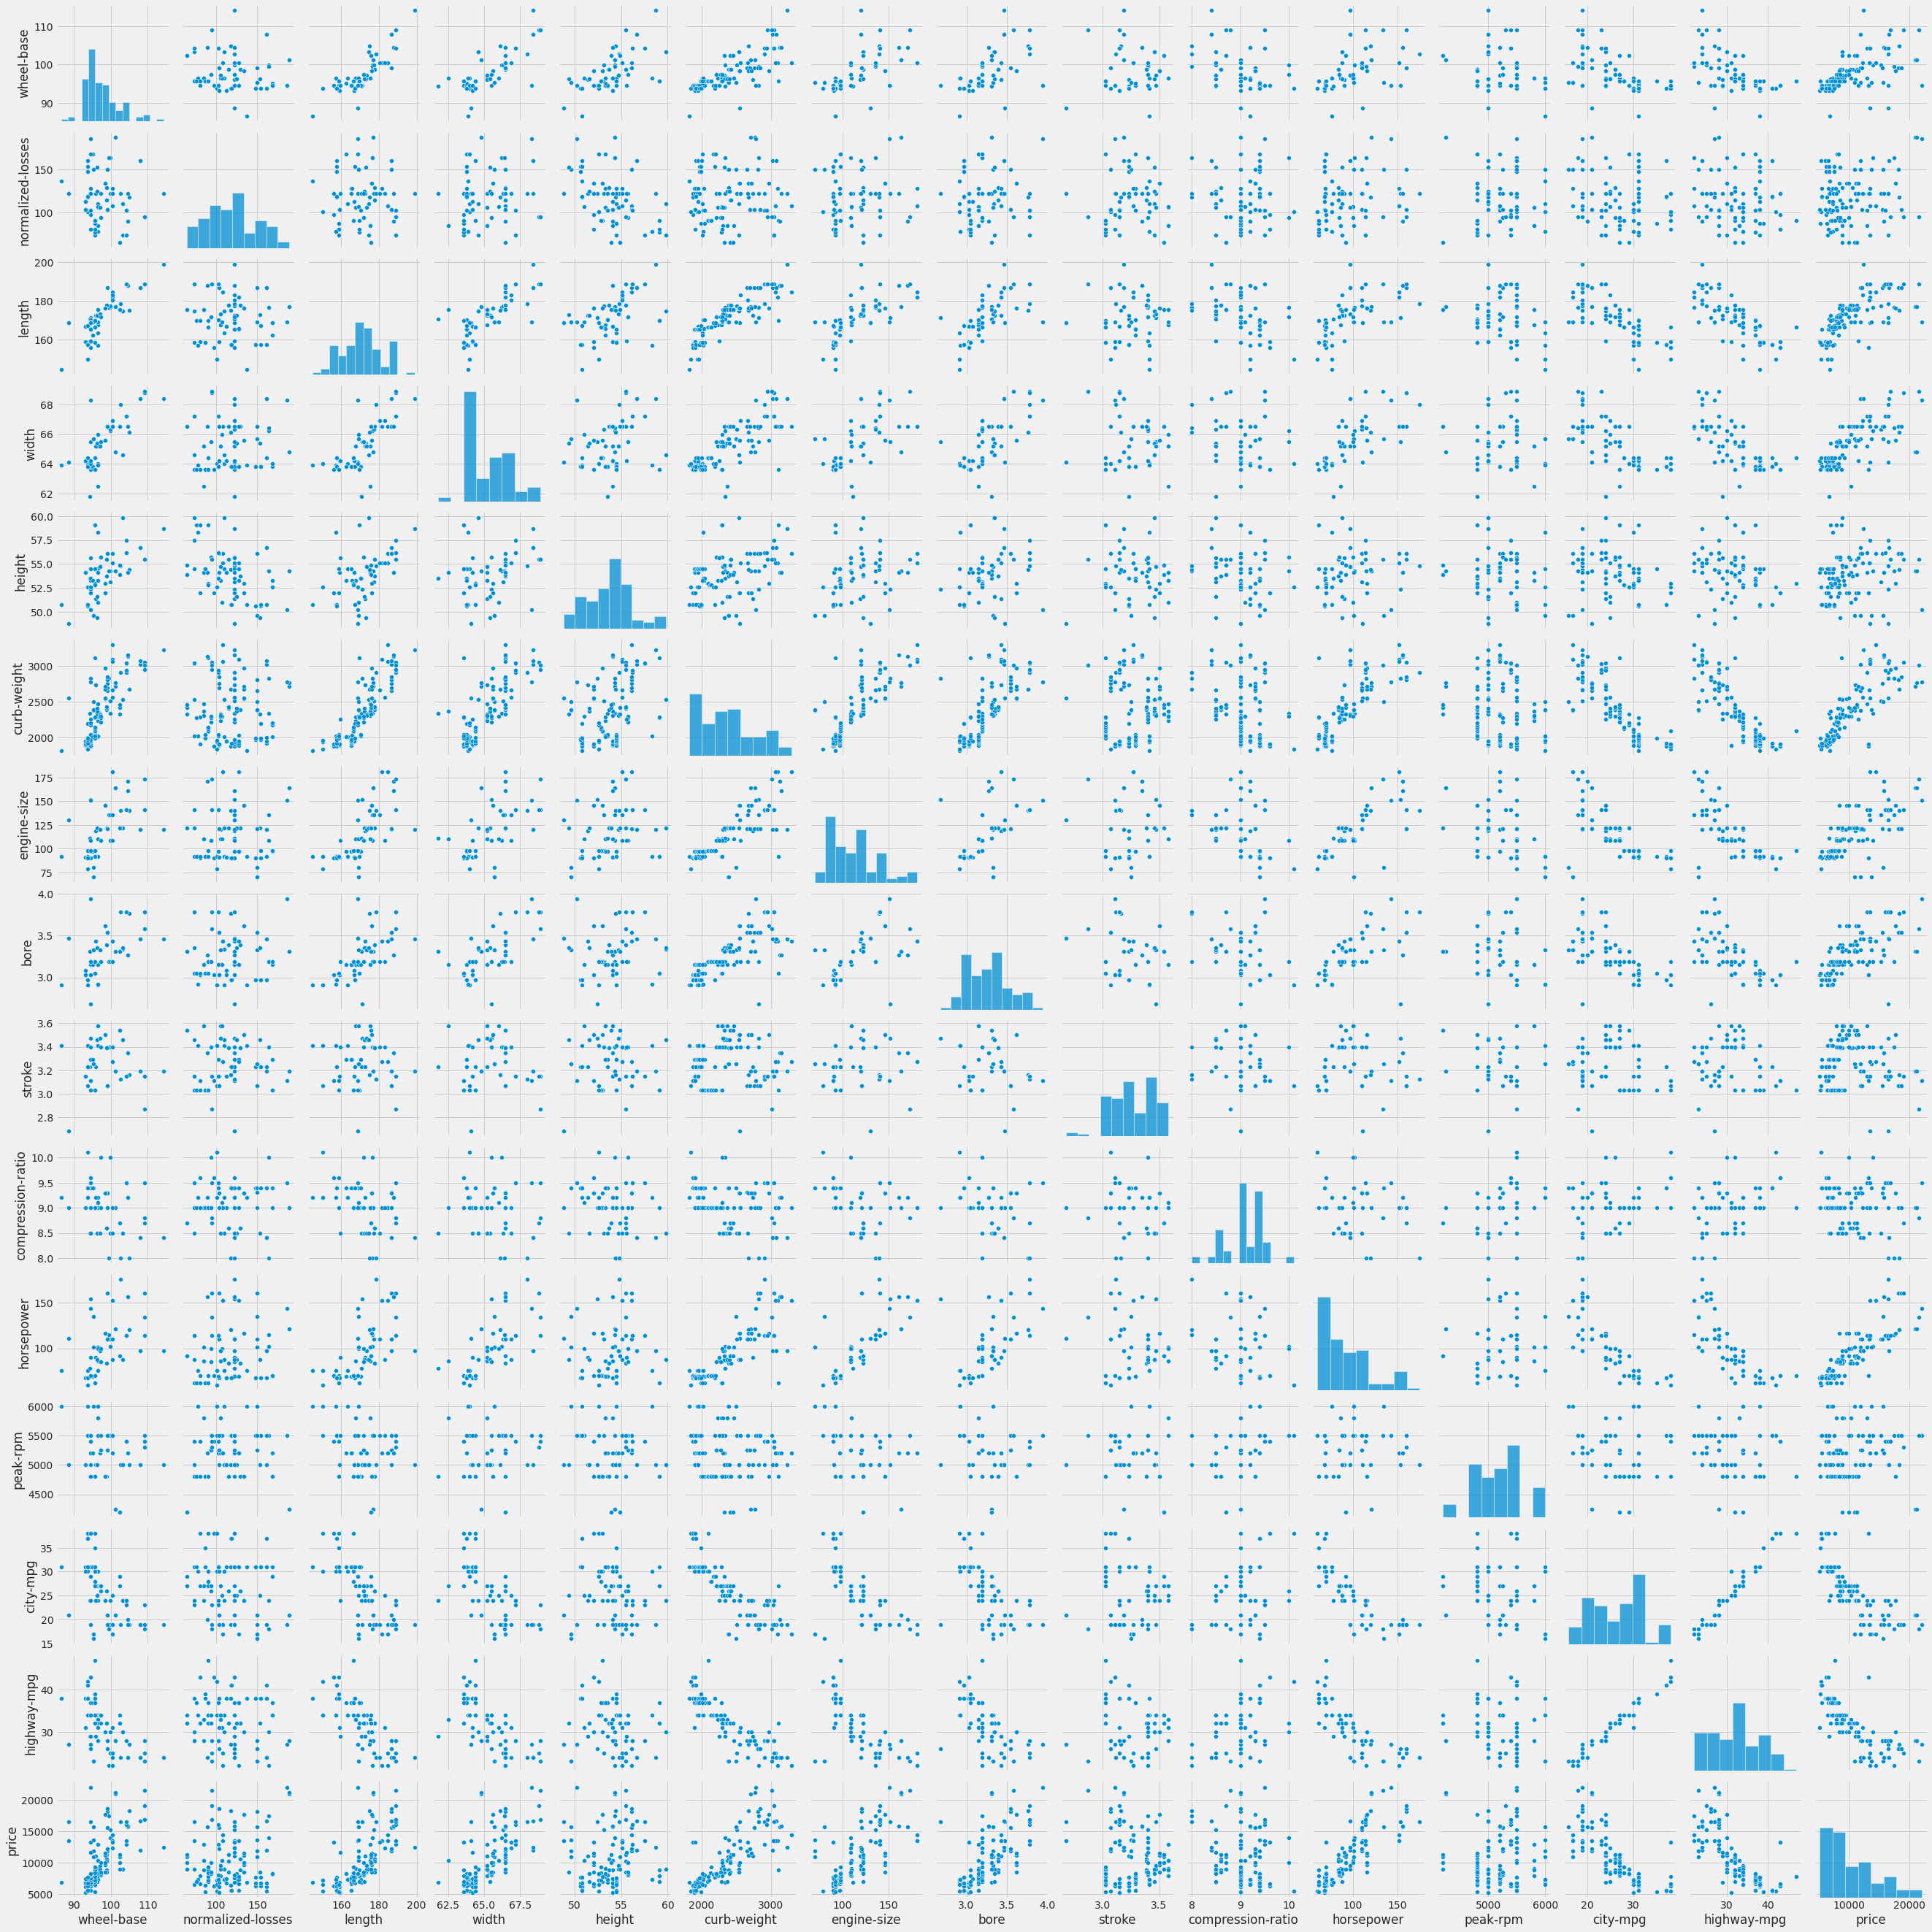

In [644]:
# Visualising the numerical variables
plt.figure(figsize=(12,12))
sns.pairplot(data[col_numeric])
plt.show()

#Visualising the categorical variables

- CarCompany - Porsche has very high median price compared to other cars,though the number of Porsche cars is very less. Volvo, alfa-romero, audi and BMW are also high median price than others. Saab has wide rage of price, with high median price.
  - aspiration - std has lower median than turbo.
  - carbody - convertible has higher median that others.
  - symboling - -2 and -1 have higher median price than others.
  - enginelocation - rear has very high median price than fromt.
  - cylindernumber - Four has lower median than others.
  - fulesystem - 1bbl and 2bbl have lower median price than others.
- Now atleast we know that what are the variables have impact on the price. So as which variables are important for the model building.

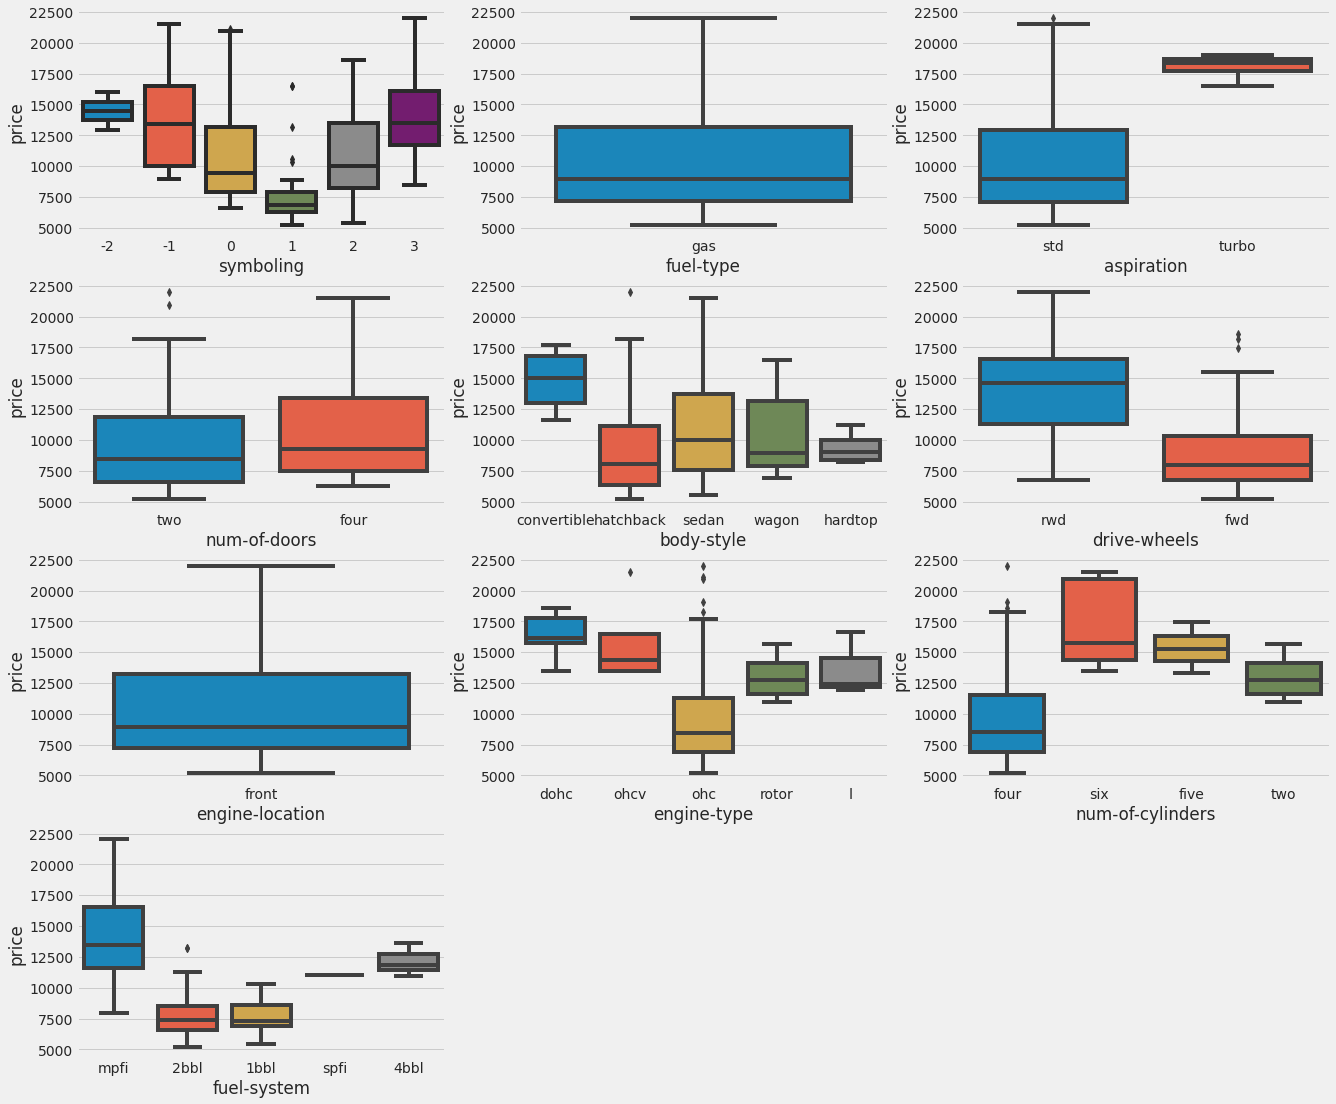

In [645]:
# Boxplot for all categorical variables except CarCompany
# As X labels are not clearly visible for CarCompany. It is plotted in the next cell with bigger figure size.
k=0
plt.figure(figsize=(20,18))
for col in range (len(col_category)-1):    
    k=k+1
    plt.subplot(4, 3, k)   
    ax = sns.boxplot(x = col_category[col], y = 'price', data = data)

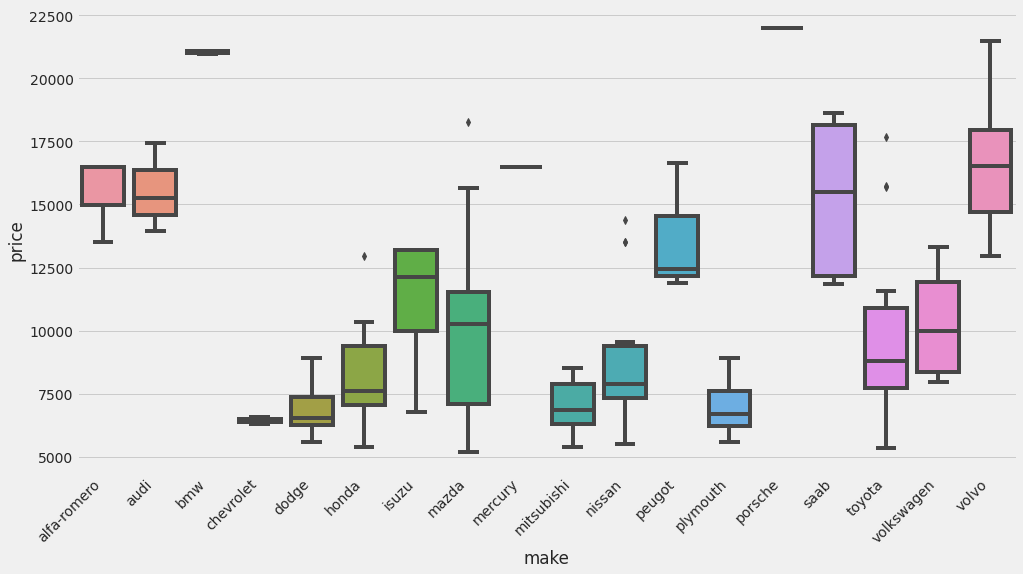

In [646]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'make', y = 'price', data = data)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#Step 2:- Preparing the data for model building
#Encoding
- Converting categorical variables (fueltype, aspiration, doornumber, drivewheel, enginelocation) with two levels to binary variables.

In [647]:
data['fuel-type'].unique()

array(['gas'], dtype=object)

In [648]:

# fueltype
# Convert "gas" to 1 and "diesel" to 0
data['fuel-type'] = data['fuel-type'].map({'gas': 1, 'diesel': 0})
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,1,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,1,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,1,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,1,std,four,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [649]:
# aspiration
# Convert "std" to 1 and "turbo" to 0
data['aspiration'] = data['aspiration'].map({'std':1, 'turbo':0})
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,1,1,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,1,1,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,1,1,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,1,1,four,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [650]:

# #cul = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
#        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
#        'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
#        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
#        'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
#        'highway-mpg', 'price']


data['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [651]:
# doornumber
# Convert "four" to 1 and "two" to 0
data['num-of-doors'] = data['num-of-doors'].map({'four':1, 'two':0})
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,1,1,0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,1,1,0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,1,1,1,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,1,1,1,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [652]:
data['drive-wheels'].unique()

array(['rwd', 'fwd'], dtype=object)

In [653]:
# drivewheel
# Convert "fwd" to 1 and "rwd" to 0
data['drive-wheels'] = data['drive-wheels'].map({'fwd':1, 'rwd':0})
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,0,convertible,0,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,1,1,0,convertible,0,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,1,1,0,hatchback,0,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,1,1,1,sedan,1,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,1,1,1,sedan,1,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [654]:
data['engine-location'].unique()

array(['front'], dtype=object)

In [655]:
# enginelocation
# Convert "front" to 1 and "rear" to 0
data['engine-location'] = data['engine-location'].map({'front':1, 'rear':0})
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,1,1,0,convertible,0,1,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,1,1,0,convertible,0,1,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,1,1,0,hatchback,0,1,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,1,1,1,sedan,1,1,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,1,1,1,sedan,1,1,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#Dummy variables
  - Converting other categorical variables with more than two levels to dummy variables. We have to create (n-1) dummy variables by removing the base status. n is the number of levels of the variables.

In [656]:
# Creating dummy variables for 'symboling'
# Dropping the redundant dummy variable (-2)
symboling_status = pd.get_dummies(data['symboling'],drop_first=True)
symboling_status.head()

,-1,0,1,2,3
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [657]:
# Renaming column names for better readability
symboling_status = symboling_status.rename(columns={-1:'symboling(-1)', 0:'symboling(0)', 1:'symboling(1)',2:'symboling(2)', 3:'symboling(3)'})
symboling_status.head()

,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [658]:
# Concating the dummy dataframe with original dataframe
data = pd.concat([data,symboling_status], axis=1)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,3,122.0,alfa-romero,1,1,0,convertible,0,1,88.6,...,111.0,5000.0,21,27,13495.0,0,0,0,0,1
1,3,122.0,alfa-romero,1,1,0,convertible,0,1,88.6,...,111.0,5000.0,21,27,16500.0,0,0,0,0,1
2,1,122.0,alfa-romero,1,1,0,hatchback,0,1,94.5,...,154.0,5000.0,19,26,16500.0,0,0,1,0,0
3,2,164.0,audi,1,1,1,sedan,1,1,99.8,...,102.0,5500.0,24,30,13950.0,0,0,0,1,0
4,2,164.0,audi,1,1,1,sedan,1,1,99.4,...,115.0,5500.0,18,22,17450.0,0,0,0,1,0


In [659]:
# Dropping the 'symboling' column as we don't need it anymore
data = data.drop('symboling',axis=1)
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3)
0,122.0,alfa-romero,1,1,0,convertible,0,1,88.6,168.8,...,111.0,5000.0,21,27,13495.0,0,0,0,0,1
1,122.0,alfa-romero,1,1,0,convertible,0,1,88.6,168.8,...,111.0,5000.0,21,27,16500.0,0,0,0,0,1
2,122.0,alfa-romero,1,1,0,hatchback,0,1,94.5,171.2,...,154.0,5000.0,19,26,16500.0,0,0,1,0,0
3,164.0,audi,1,1,1,sedan,1,1,99.8,176.6,...,102.0,5500.0,24,30,13950.0,0,0,0,1,0
4,164.0,audi,1,1,1,sedan,1,1,99.4,176.6,...,115.0,5500.0,18,22,17450.0,0,0,0,1,0


In [660]:
# Creating dummy variables for 'carbody'
# Dropping the redundant dummy variable (convertible)
carbody_status = pd.get_dummies(data['body-style'],drop_first=True)
carbody_status.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [661]:
# Renaming column names for better readability
carbody_status = carbody_status.rename(columns={'hardtop':'carbody(hardtop)', 'hatchback':'carbody(hatchback)', 'sedan':'carbody(sedan)','wagon':'carbody(wagon)'})
carbody_status.head()

,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [662]:
# Concating the dummy dataframe with original dataframe
data = pd.concat([data,carbody_status], axis=1)
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,122.0,alfa-romero,1,1,0,convertible,0,1,88.6,168.8,...,13495.0,0,0,0,0,1,0,0,0,0
1,122.0,alfa-romero,1,1,0,convertible,0,1,88.6,168.8,...,16500.0,0,0,0,0,1,0,0,0,0
2,122.0,alfa-romero,1,1,0,hatchback,0,1,94.5,171.2,...,16500.0,0,0,1,0,0,0,1,0,0
3,164.0,audi,1,1,1,sedan,1,1,99.8,176.6,...,13950.0,0,0,0,1,0,0,0,1,0
4,164.0,audi,1,1,1,sedan,1,1,99.4,176.6,...,17450.0,0,0,0,1,0,0,0,1,0


In [663]:
# Dropping the 'symboling' column as we don't need it
data = data.drop('body-style',axis=1)
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,price,symboling(-1),symboling(0),symboling(1),symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,13495.0,0,0,0,0,1,0,0,0,0
1,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,16500.0,0,0,0,0,1,0,0,0,0
2,122.0,alfa-romero,1,1,0,0,1,94.5,171.2,65.5,...,16500.0,0,0,1,0,0,0,1,0,0
3,164.0,audi,1,1,1,1,1,99.8,176.6,66.2,...,13950.0,0,0,0,1,0,0,0,1,0
4,164.0,audi,1,1,1,1,1,99.4,176.6,66.4,...,17450.0,0,0,0,1,0,0,0,1,0


 cul = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
        'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
        'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price']

In [664]:
# Creating dummy variables for 'enginetype'
# Dropping the redundant dummy variable (dohc)
enginetype_status = pd.get_dummies(data['engine-type'], drop_first=True)
enginetype_status.head()

,l,ohc,ohcv,rotor
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [665]:
# Renaming column name for better readability
enginetype_status = enginetype_status.rename(columns={'dohcv':'enginetype(dohcv)', 'l':'enginetype(l)', 'ohc':'enginetype(ohc)', 
                                                      'ohcf':'enginetype(ohcf)','ohcv':'enginetype(ohcv)' ,'rotor':'enginetype(rotor)'})
enginetype_status.head()

,enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [666]:
# Concating the dummy dataframe with original dataframe
data = pd.concat([data,enginetype_status], axis=1)
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,1,0,0,0,0,0,0,0,0
1,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,1,0,0,0,0,0,0,0,0
2,122.0,alfa-romero,1,1,0,0,1,94.5,171.2,65.5,...,0,0,0,1,0,0,0,0,1,0
3,164.0,audi,1,1,1,1,1,99.8,176.6,66.2,...,1,0,0,0,1,0,0,1,0,0
4,164.0,audi,1,1,1,1,1,99.4,176.6,66.4,...,1,0,0,0,1,0,0,1,0,0


In [667]:
# Dropping the 'enginetype' column as we don't need it
data = data.drop('engine-type',axis=1)
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,symboling(2),symboling(3),carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,1,0,0,0,0,0,0,0,0
1,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,1,0,0,0,0,0,0,0,0
2,122.0,alfa-romero,1,1,0,0,1,94.5,171.2,65.5,...,0,0,0,1,0,0,0,0,1,0
3,164.0,audi,1,1,1,1,1,99.8,176.6,66.2,...,1,0,0,0,1,0,0,1,0,0
4,164.0,audi,1,1,1,1,1,99.4,176.6,66.4,...,1,0,0,0,1,0,0,1,0,0


In [668]:
# Creating dummy variables for 'cylindernumber'
# Dropping the redundant dummy variable (eight)
cylindernumber_status = pd.get_dummies(data['num-of-cylinders'], drop_first=True)
cylindernumber_status.head()

,four,six,two
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,0


In [669]:
# Renaming column name for better readability
cylindernumber_status = cylindernumber_status.rename(columns={'five':'cylindernumber(five)', 'four':'cylindernumber(four)', 'six':'cylindernumber(six)', 
                                                      'three':'cylindernumber(three)','twelve':'cylindernumber(twelve)' ,'two':'cylindernumber(two)'})
cylindernumber_status.head()

,cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,0


In [670]:
# Concating the dummy dataframe with original dataframe
data = pd.concat([data,cylindernumber_status], axis=1)
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,122.0,alfa-romero,1,1,0,0,1,94.5,171.2,65.5,...,1,0,0,0,0,1,0,0,1,0
3,164.0,audi,1,1,1,1,1,99.8,176.6,66.2,...,0,1,0,0,1,0,0,1,0,0
4,164.0,audi,1,1,1,1,1,99.4,176.6,66.4,...,0,1,0,0,1,0,0,0,0,0


In [671]:
# Dropping the 'cylindernumber' column as we don't need it
data = data.drop('num-of-cylinders',axis=1)
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two)
0,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,122.0,alfa-romero,1,1,0,0,1,94.5,171.2,65.5,...,1,0,0,0,0,1,0,0,1,0
3,164.0,audi,1,1,1,1,1,99.8,176.6,66.2,...,0,1,0,0,1,0,0,1,0,0
4,164.0,audi,1,1,1,1,1,99.4,176.6,66.4,...,0,1,0,0,1,0,0,0,0,0


In [672]:
# Creating dummy variables for 'fuelsystem'
# Dropping the redundant dummy variable (1bbl)
fuelsystem_status = pd.get_dummies(data['fuel-system'], drop_first=True)
fuelsystem_status.head()

,2bbl,4bbl,mpfi,spfi
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [673]:
# Renaming column name for better readability
fuelsystem_status = fuelsystem_status.rename(columns={'2bbl':'fuelsystem(2bbl)', '4bbl':'fuelsystem(4bbl)', 'idi':'fuelsystem(idi)', 
                                                      'mfi':'fuelsystem(mfi)','mpfi':'fuelsystem(mpfi)' ,'spdi':'fuelsystem(spdi)',
                                                             'spfi':'fuelsystem(spfi)'})
fuelsystem_status.head()

,fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [674]:
# Concating the dummy dataframe with original dataframe
data = pd.concat([data,fuelsystem_status], axis=1)
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,1,0
1,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,1,0
2,122.0,alfa-romero,1,1,0,0,1,94.5,171.2,65.5,...,0,1,0,0,1,0,0,0,1,0
3,164.0,audi,1,1,1,1,1,99.8,176.6,66.2,...,1,0,0,1,0,0,0,0,1,0
4,164.0,audi,1,1,1,1,1,99.4,176.6,66.4,...,1,0,0,0,0,0,0,0,1,0


In [675]:
# Dropping the 'fuelsystem' column as we don't need it
data = data.drop('fuel-system',axis=1)
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,enginetype(ohc),enginetype(ohcv),enginetype(rotor),cylindernumber(four),cylindernumber(six),cylindernumber(two),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,1,0
1,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,0,0,1,0,0,0,0,1,0
2,122.0,alfa-romero,1,1,0,0,1,94.5,171.2,65.5,...,0,1,0,0,1,0,0,0,1,0
3,164.0,audi,1,1,1,1,1,99.8,176.6,66.2,...,1,0,0,1,0,0,0,0,1,0
4,164.0,audi,1,1,1,1,1,99.4,176.6,66.4,...,1,0,0,0,0,0,0,0,1,0


In [676]:
# Creating dummy variables for 'CarCompany'
# Dropping the redundant dummy variable (alfa-romero)
CarCompany_status = pd.get_dummies(data['make'], drop_first=True)
CarCompany_status.head()

,audi,bmw,chevrolet,dodge,honda,isuzu,mazda,mercury,mitsubishi,nissan,peugot,plymouth,porsche,saab,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [677]:
# Renaming column name for better readability
CarCompany_status = CarCompany_status.rename(columns={'audi':'CarCompany(audi)', 'bmw':'CarCompany(bmw)', 'buick':'CarCompany(buick)', 
                                                      'chevrolet':'CarCompany(chevrolet)','dodge':'CarCompany(dodge)' ,'honda':'CarCompany(honda)',
                                                      'isuzu':'CarCompany(isuzu)','jaguar':'CarCompany(jaguar)','mazda':'CarCompany(mazda)',
                                                      'mercury':'CarCompany(mercury)','mitsubishi':'CarCompany(mitsubishi)','nissan':'CarCompany(nissan)',
                                                      'peugeot':'CarCompany(peugeot)','plymouth':'CarCompany(plymouth)','porsche':'CarCompany(porsche)',
                                                      'renault':'CarCompany(renault)','saab':'CarCompany(saab)','subaru':'CarCompany(subaru)',
                                                      'toyota':'CarCompany(toyota)','volkswagen':'CarCompany(volkswagen)','volvo':'CarCompany(volvo)'})
                                                    
CarCompany_status.head()

,CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),peugot,CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [678]:
# Concating the dummy dataframe with original dataframe
data = pd.concat([data,CarCompany_status], axis=1)
data.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),peugot,CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,122.0,alfa-romero,1,1,0,0,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,122.0,alfa-romero,1,1,0,0,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,0,0,0
3,164.0,audi,1,1,1,1,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,0,0
4,164.0,audi,1,1,1,1,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,0,0


In [679]:
# Dropping the 'CarCompany' column as we don't need it
data = data.drop('make',axis=1)
data.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,height,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),peugot,CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,122.0,1,1,0,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,122.0,1,1,0,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,122.0,1,1,0,0,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,164.0,1,1,1,1,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,164.0,1,1,1,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [680]:
x = data.loc[:,['normalized-losses', 'fuel-type', 'aspiration', 'num-of-doors',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg','symboling(-1)', 'symboling(0)', 'symboling(1)',
       'symboling(2)', 'symboling(3)', 'carbody(hardtop)',
       'carbody(hatchback)', 'carbody(sedan)', 'carbody(wagon)',
       'enginetype(l)', 'enginetype(ohc)', 'enginetype(ohcv)',
       'enginetype(rotor)', 'cylindernumber(four)', 'cylindernumber(six)',
       'cylindernumber(two)', 'fuelsystem(2bbl)', 'fuelsystem(4bbl)',
       'fuelsystem(mpfi)', 'fuelsystem(spfi)', 'CarCompany(audi)',
       'CarCompany(bmw)', 'CarCompany(chevrolet)', 'CarCompany(dodge)',
       'CarCompany(honda)', 'CarCompany(isuzu)', 'CarCompany(mazda)',
       'CarCompany(mercury)', 'CarCompany(mitsubishi)', 'CarCompany(nissan)',
       'peugot', 'CarCompany(plymouth)', 'CarCompany(porsche)',
       'CarCompany(saab)', 'CarCompany(toyota)', 'CarCompany(volkswagen)',
       'CarCompany(volvo)']]

y = data.loc[:,'price']

In [681]:
x.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,height,...,CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),peugot,CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,122.0,1,1,0,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,122.0,1,1,0,0,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,122.0,1,1,0,0,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,164.0,1,1,1,1,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,164.0,1,1,1,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [682]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [683]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 202
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   normalized-losses       121 non-null    float64
 1   fuel-type               121 non-null    int64  
 2   aspiration              121 non-null    int64  
 3   num-of-doors            121 non-null    int64  
 4   drive-wheels            121 non-null    int64  
 5   engine-location         121 non-null    int64  
 6   wheel-base              121 non-null    float64
 7   length                  121 non-null    float64
 8   width                   121 non-null    float64
 9   height                  121 non-null    float64
 10  curb-weight             121 non-null    int64  
 11  engine-size             121 non-null    int64  
 12  bore                    121 non-null    float64
 13  stroke                  121 non-null    float64
 14  compression-ratio       121 non-null    fl

#Splitting Data into Train and test

In [684]:
#Importing Model Building Libaries

# Train-test split
from sklearn.model_selection import train_test_split
# Min-max scling
from sklearn.preprocessing import MinMaxScaler
# Statsmodel 
import statsmodels.api as sm
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#R-squared
from sklearn.metrics import r2_score
# Label encoding
from sklearn.preprocessing import LabelEncoder
# Importing RFE
from sklearn.feature_selection import RFE
# Importing LinearRegression
from sklearn.linear_model import LinearRegression
# Supress warning
import warnings
warnings.filterwarnings('ignore')

In [685]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [686]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [687]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

#Model Creation Linear Regression

In [688]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

LinearRegression(normalize=True)

In [689]:
# print the intercept
print(lin_reg.intercept_)

12401.400923571686


In [690]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
normalized-losses,5.364262e+02
fuel-type,4.911271e-11
aspiration,-7.135967e+02
num-of-doors,4.517465e+02
drive-wheels,-1.911465e+02
engine-location,-9.822543e-11
wheel-base,1.214284e+04
length,-4.232021e+03
width,2.269482e+03
height,-3.810101e+03


#Prediction from our model

In [691]:
pred = lin_reg.predict(x_test)
pred

array([10327.23884945, 23890.93919519, 16804.43226042,  6594.76993172,
       10174.6998297 ,  9426.91386408,  6884.37240061,  5043.34217433,
       18535.82106196,  8170.20742958,  7555.64493054,  6044.76139966,
        5080.18061249,  8262.77502563, 10495.33986194, 18173.83170366,
        9874.61397272, 16966.04542699,  8140.4676725 ,  9896.05780829,
       14324.84419744,  9527.24163496, 12199.6243466 , 11430.09044116,
       10327.23884945])

In [692]:
test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1631.7548865140263
MSE: 5568857.322725073
RMSE: 2359.8426478740216
R2 Square 0.5950985663635897
__________________________________
Train set evaluation:
_____________________________________
MAE: 659.7588443098801
MSE: 671090.4995822677
RMSE: 819.2011349981565
R2 Square 0.9626935377493883
__________________________________


#Robust Regression 
#Random Sample Consensus - RANSAC

In [693]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 2850.377532020369
MSE: 21900968.845926296
RMSE: 4679.8470964259395
R2 Square -0.5923794002685214
__________________________________
Train set evaluation:
_____________________________________
MAE: 1297.6926676300573
MSE: 11395141.908167949
RMSE: 3375.6691052542383
R2 Square 0.366534868692002
__________________________________


#Ridge Regression

In [694]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1869.0625915053417
MSE: 5144109.611156661
RMSE: 2268.0629645485287
R2 Square 0.6259811958477433
__________________________________
Train set evaluation:
_____________________________________
MAE: 2196.7318893822303
MSE: 8107280.544626266
RMSE: 2847.328668177642
R2 Square 0.5493097342586634
__________________________________


#Lasso Regression

In [695]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1086.3260714321107
MSE: 2140202.7459618445
RMSE: 1462.9431793346741
R2 Square 0.8443897715647555
__________________________________
Train set evaluation:
_____________________________________
MAE: 1072.5992746327288
MSE: 2072005.5320534536
RMSE: 1439.4462588278361
R2 Square 0.8848155409550171
__________________________________


#Elastic Net

In [696]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(x_train, y_train)

test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1207.3732628964087
MSE: 2418734.7579660695
RMSE: 1555.228201250887
R2 Square 0.8241382182498722
__________________________________
Train set evaluation:
_____________________________________
MAE: 1023.4487602922059
MSE: 1802685.98602198
RMSE: 1342.641421237249
R2 Square 0.8997872317830489
__________________________________


#Polynomial Regression

In [697]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

x_train_2_d = poly_reg.fit_transform(x_train)
x_test_2_d = poly_reg.transform(x_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train_2_d,y_train)

test_pred = lin_reg.predict(x_test_2_d)
train_pred = lin_reg.predict(x_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 5679253330676.771
MSE: 7.540490466357226e+25
RMSE: 8683599752612.522
R2 Square -5.48255274504984e+18
__________________________________
Train set evaluation:
_____________________________________
MAE: 37.48772090070482
MSE: 24549.048928726774
RMSE: 156.68136114013936
R2 Square 0.9986352985659639
__________________________________


#Stochastic Gradient Descent

In [698]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(x_train, y_train)

test_pred = sgd_reg.predict(x_test)
train_pred = sgd_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1101.647249790968
MSE: 2469197.5754734827
RMSE: 1571.3680585634554
R2 Square 0.820469159056938
__________________________________
Train set evaluation:
_____________________________________
MAE: 1249.030230590947
MSE: 2604907.2553506363
RMSE: 1613.9725076192085
R2 Square 0.8551911042570646
__________________________________


# Random Forest Regressor

In [699]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_train, y_train)

test_pred = rf_reg.predict(x_test)
train_pred = rf_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 862.9970688166312
MSE: 1519722.824088209
RMSE: 1232.7703857929948
R2 Square 0.889503732176392
__________________________________
Train set evaluation:
_____________________________________
MAE: 478.478963731933
MSE: 431517.79972999886
RMSE: 656.900144413136
R2 Square 0.9760115774010882
__________________________________


#Support Vector Machine

In [700]:

from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(x_train, y_train)

test_pred = svm_reg.predict(x_test)
train_pred = svm_reg.predict(x_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1349.8107789830328
MSE: 3968916.7746342896
RMSE: 1992.2140383589033
R2 Square 0.7114273182264543
__________________________________
Train set evaluation:
_____________________________________
MAE: 174.7889295273078
MSE: 267005.22538857773
RMSE: 516.7254835873471
R2 Square 0.9851569641235043
__________________________________


In [701]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,1.631755e+03,5.568857e+06,2.359843e+03,5.950986e-01,-6.798027
1,Robust Regression,2.850378e+03,2.190097e+07,4.679847e+03,-5.923794e-01,-6.265568
2,Ridge Regression,1.869063e+03,5.144110e+06,2.268063e+03,6.259812e-01,-1.130755
3,Lasso Regression,1.086326e+03,2.140203e+06,1.462943e+03,8.443898e-01,-2.681879
4,Elastic Net Regression,1.207373e+03,2.418735e+06,1.555228e+03,8.241382e-01,-0.659303
5,Polynomail Regression,5.679253e+12,7.540490e+25,8.683600e+12,-5.482553e+18,0.000000
6,Stochastic Gradient Descent,1.101647e+03,2.469198e+06,1.571368e+03,8.204692e-01,0.000000
7,Random Forest Regressor,8.629971e+02,1.519723e+06,1.232770e+03,8.895037e-01,0.000000
8,SVM Regressor,1.349811e+03,3.968917e+06,1.992214e+03,7.114273e-01,0.000000


#Model Comparison

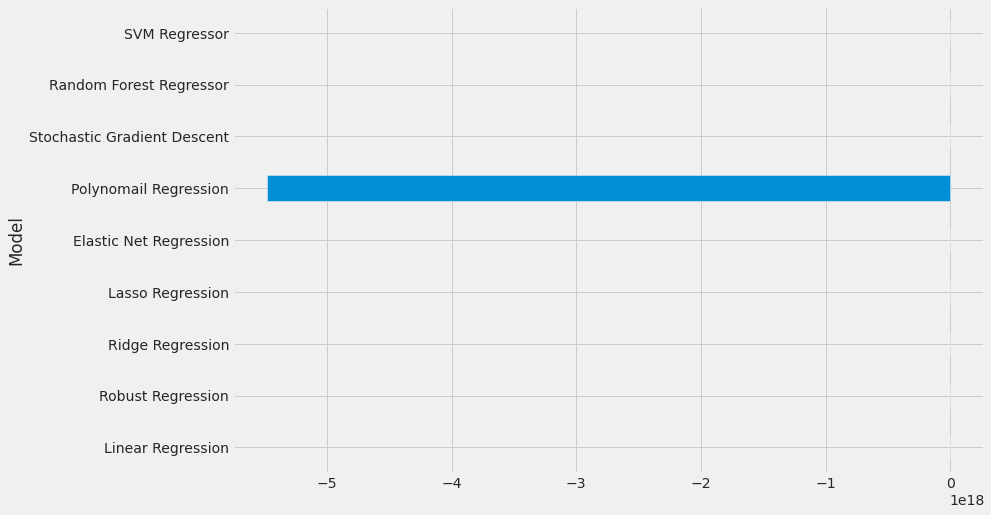

In [702]:
results_df.set_index(results_df['Model'], inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

#Out of All the Model Random Forest Regressor is the Best Model 